In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import numpy as np
from collections import Counter
from sklearn.externals import joblib
from sklearn.model_selection import KFold
import graphviz
import matplotlib.pyplot as plt

In [2]:
def load(which_set, shuffel_order=True, rng=None):
    data_path = "../processed_data/data/"+which_set+".npy"
    targets_path = "../processed_data/targets/" + which_set + ".npy"
    inputs = np.load(data_path)
    targets = np.load(targets_path)

    # get only the activity targets and encode them in ints
    targets = to_int_targets(targets.T[0].T)

    print(targets)
    # one-hot encode the targets
    permutation = np.random.permutation(inputs.shape[0])
    inputs = inputs[permutation]
    targets = targets[permutation]
    return inputs, targets

def to_one_of_k(targets):
    unique_targets = list(set(targets[:,].tolist()))
    encoding = dict(zip(unique_targets, range(0, len(unique_targets))))
    int_targets = [encoding[i] for i in targets.tolist()]
    one_of_k_targets = np.zeros((len(int_targets), 4)).astype(int)
    one_of_k_targets[range(len(int_targets)), int_targets] = 1
    return one_of_k_targets

def to_int_targets(targets):
        unique_targets = list(set(targets.tolist()))
        unique_targets.sort();
        encoding = dict(zip(unique_targets, range(0, len(unique_targets))))
        return np.array([encoding[i] for i in targets.tolist()])

# Load training data

In [7]:
position = "Wrist"
seed = 6102016 
rng = np.random.RandomState(seed)
X, y= load(position+'_train', rng=rng)
print("Number of training data: " + str(X.shape))
c = Counter(y)
print(c)

[0 0 0 ... 2 2 2]
Number of training data: (15927, 600)
Counter({3: 5349, 0: 3933, 2: 3809, 1: 2836})


# Train neural network

In [8]:
units = 25
clf = MLPClassifier(hidden_layer_sizes=(units, units, units), activation = 'relu', alpha=1e-4,
                            solver='adam', batch_size=100, learning_rate_init=0.009,
                            warm_start=True,max_iter=100, shuffle=False,validation_fraction=0.15, tol=1e-3,verbose=True, early_stopping=True)

clf.fit(X, y)

Iteration 1, loss = 1.77190785
Validation score: 0.823013
Iteration 2, loss = 0.30340351
Validation score: 0.908368
Iteration 3, loss = 0.17481184
Validation score: 0.931799
Iteration 4, loss = 0.13649643
Validation score: 0.944351
Iteration 5, loss = 0.14005708
Validation score: 0.946025
Iteration 6, loss = 0.10623296
Validation score: 0.957741
Iteration 7, loss = 0.09470730
Validation score: 0.963598
Iteration 8, loss = 0.05663152
Validation score: 0.978661
Iteration 9, loss = 0.02713921
Validation score: 0.979498
Iteration 10, loss = 0.05860011
Validation score: 0.956485
Iteration 11, loss = 0.17334750
Validation score: 0.956485
Iteration 12, loss = 0.06330216
Validation score: 0.977824
Iteration 13, loss = 0.05347604
Validation score: 0.970293
Iteration 14, loss = 0.05084628
Validation score: 0.971548
Iteration 15, loss = 0.08889319
Validation score: 0.954393
Iteration 16, loss = 0.07656663
Validation score: 0.987448
Iteration 17, loss = 0.02275354
Validation score: 0.992050
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(25, 25, 25), learning_rate='constant',
       learning_rate_init=0.009, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='adam', tol=0.001,
       validation_fraction=0.15, verbose=True, warm_start=True)

# Learning curve

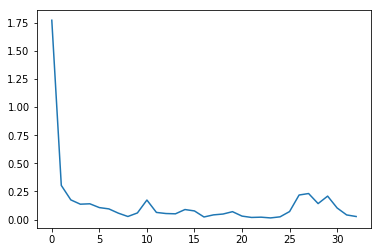

In [9]:
loss = clf.loss_curve_
plt.plot(loss, label="adam")

# Testing neural network

In [22]:
test_x, test_y= load(position+'_test', rng=rng)
y_true = test_y
y_pre = clf.predict(test_x)
print("Number of test data: " + str(test_x.shape))

f1 = (metrics.f1_score(y_true, y_pre, average=None)).tolist()
print("F1 score: " + str(np.mean(f1)))
conf = metrics.confusion_matrix(y_true=y_true, y_pred=y_pre)
print("Confusion Matrix")
print(conf)

[0 0 0 ... 1 1 1]
Number of test data: (3258, 600)
F1 score: 0.937668072822694
Confusion Matrix
[[658   0   0  75]
 [  0 762   0  20]
 [  0  18 849  21]
 [ 51  17   0 787]]


# Exporting parameters

In [6]:
para = clf.coefs_
para = np.asarray(para)
print(para[0].shape)
print(para[1].shape)
print(para[2].shape)
print(para[3].shape)
np.savetxt('para_wrist_L_0.csv', para[0],delimiter=",")
np.savetxt('para_wrist_L_1.csv', para[1],delimiter=",")
np.savetxt('para_wrist_L_2.csv', para[2],delimiter=",")
np.savetxt('para_wrist_L_3.csv', para[3],delimiter=",")

(600, 25)
(25, 25)
(25, 25)
(25, 4)
